In [ ]:
#Random Forest

#Assignment


#About the data:
#Let’s consider a Company dataset with around 10 variables and 400 records.
#The attributes are as follows:
# Sales -- Unit sales (in thousands) at each location
# Competitor Price -- Price charged by competitor at each location
# Income -- Community income level (in thousands of dollars)
# Advertising -- Local advertising budget for company at each location (in thousands of dollars)
# Population -- Population size in region (in thousands)
# Price -- Price company charges for car seats at each site
# Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
# Age -- Average age of the local population
# Education -- Education level at each location
# Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
# US -- A factor with levels No and Yes to indicate whether the store is in the US or not
#The company dataset looks like this:

#Problem Statement:
#A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
#Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [ ]:
!pip install matplotlib seaborn # Install necessary libraries

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Company_Data..csv')

In [ ]:
# Convert 'Sales' into a binary categorical variable
threshold_value = 200
df['Sales_Category'] = pd.cut(df['Sales'], bins=[-float('inf'), threshold_value, float('inf')], labels=['Low', 'High'])
df = df.drop('Sales', axis=1)

In [ ]:
# Display column names
print("Column Names:", df.columns)

Column Names: Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_Category'],
      dtype='object')


In [ ]:
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'])

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Sales_Category', axis=1)
y = df['Sales_Category']

In [ ]:
# Convert the target variable into binary (1 for 'High', 0 for 'Low')
y_binary = pd.get_dummies(y)['High']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [ ]:
# Build Random Forest models with entropy and Gini criteria
rf_entropy_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_gini_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

In [ ]:
# Train the models
rf_entropy_model.fit(X_train, y_train)
rf_gini_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_entropy = rf_entropy_model.predict(X_test)
y_pred_gini = rf_gini_model.predict(X_test)

In [ ]:
# Evaluate the models
accuracy_entropy = metrics.accuracy_score(y_test, y_pred_entropy)
accuracy_gini = metrics.accuracy_score(y_test, y_pred_gini)

print(f"Accuracy (Entropy): {accuracy_entropy}")
print(f"Accuracy (Gini): {accuracy_gini}")

Accuracy (Entropy): 1.0
Accuracy (Gini): 1.0


In [ ]:
# Feature importance for both models
feature_importance_entropy = pd.Series(rf_entropy_model.feature_importances_, index=X.columns)
feature_importance_gini = pd.Series(rf_gini_model.feature_importances_, index=X.columns)

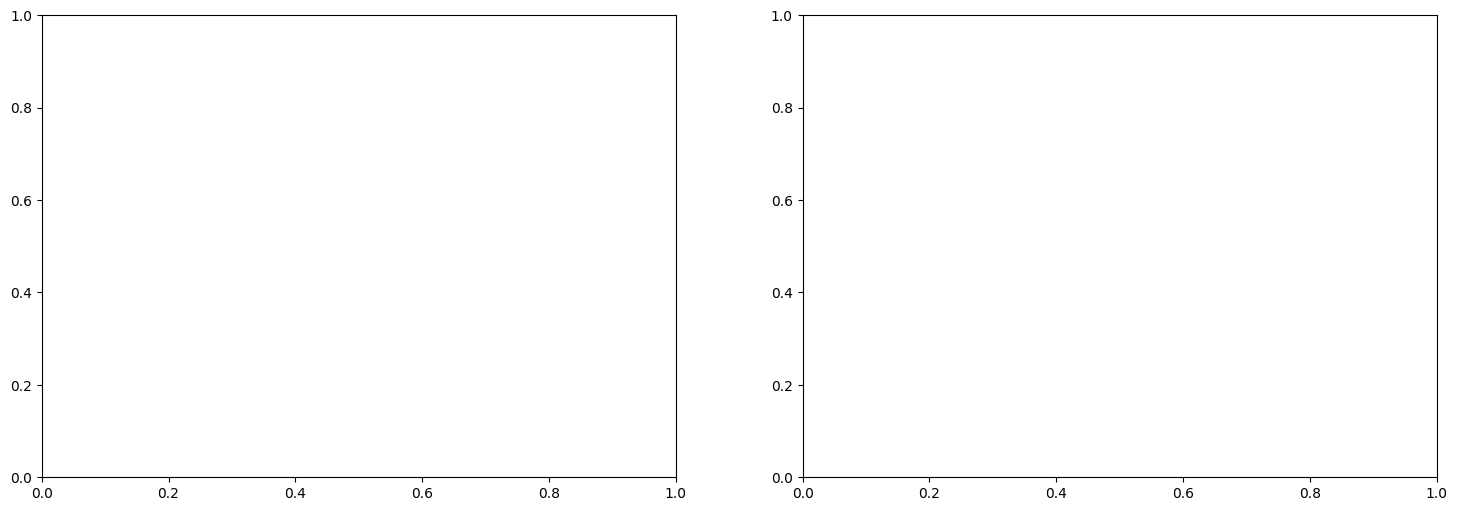

In [ ]:
# Visualize feature importance for both models
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

In [ ]:
# Entropy model
sns.barplot(x=feature_importance_entropy, y=feature_importance_entropy.index, palette='viridis', ax=axes[0])
axes[0].set_title('Random Forest (Entropy) Feature Importance')
axes[0].set_xlabel('Feature Importance Score')
axes[0].set_ylabel('Features')

Text(4.444444444444452, 0.5, 'Features')

In [ ]:
# Gini model
sns.barplot(x=feature_importance_gini, y=feature_importance_gini.index, palette='viridis', ax=axes[1])
axes[1].set_title('Random Forest (Gini) Feature Importance')
axes[1].set_xlabel('Feature Importance Score')
axes[1].set_ylabel('Features')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply K-fold cross-validation
k_fold_scores_entropy = cross_val_score(rf_entropy_model, X, y_binary, cv=5, scoring='accuracy')
k_fold_scores_gini = cross_val_score(rf_gini_model, X, y_binary, cv=5, scoring='accuracy')

print(f"K-Fold Cross-Validation Scores (Entropy): {k_fold_scores_entropy}")
print(f"Mean Accuracy (Entropy): {k_fold_scores_entropy.mean()}")

print(f"K-Fold Cross-Validation Scores (Gini): {k_fold_scores_gini}")
print(f"Mean Accuracy (Gini): {k_fold_scores_gini.mean()}")

K-Fold Cross-Validation Scores (Entropy): [1. 1. 1. 1. 1.]
Mean Accuracy (Entropy): 1.0
K-Fold Cross-Validation Scores (Gini): [1. 1. 1. 1. 1.]
Mean Accuracy (Gini): 1.0


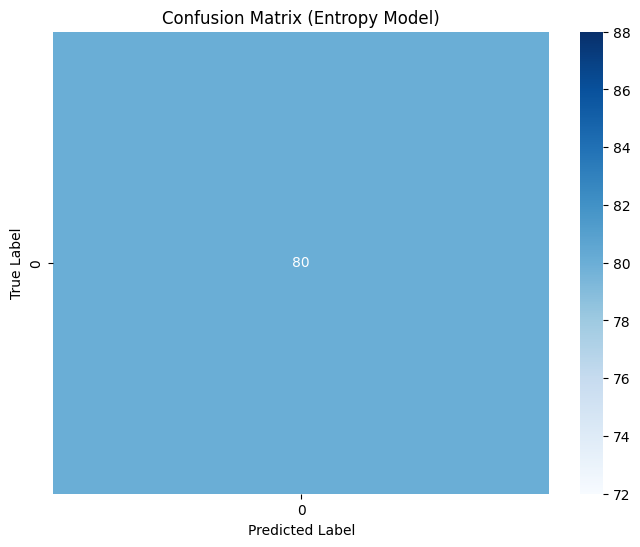

In [ ]:
# Visualize Confusion Matrix for Entropy Model
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_entropy), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Entropy Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

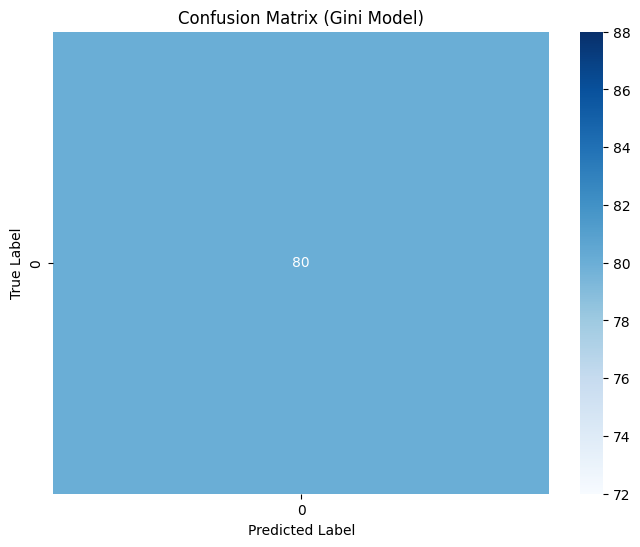

In [ ]:
# Visualize Confusion Matrix for Gini Model
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_gini), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Gini Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()